In [62]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')
pd.set_option('display.max_columns',200)
df=pd.read_csv('GT.csv',encoding='latin1')
pd.set_option('display.max_rows',200)

In [53]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [54]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [55]:
df_attack_country = df.loc[:,['country_txt','attacktype1_txt']]
df_attack_country.head()

,country_txt,attacktype1_txt
0,Dominican Republic,Assassination
1,Mexico,Hostage Taking (Kidnapping)
2,Philippines,Assassination
3,Greece,Bombing/Explosion
4,Japan,Facility/Infrastructure Attack


In [56]:
df_group_table = df_attack_country.groupby(['country_txt','attacktype1_txt']).agg({'attacktype1_txt':'count'})

In [57]:
df_group_table.columns=['attack_count']
df_group_table.reset_index(drop=False,inplace=True)

In [83]:
df_new = df_group_table[(df_group_table.attacktype1_txt =='Armed Assault')|
                        (df_group_table.attacktype1_txt =='Assassination') |
                       (df_group_table.attacktype1_txt =='Bombing/Explosion')].iloc[0:70,:]
df_new.head()

,country_txt,attacktype1_txt,attack_count
0,Afghanistan,Armed Assault,2877
1,Afghanistan,Assassination,954
2,Afghanistan,Bombing/Explosion,6245
9,Albania,Armed Assault,11
10,Albania,Assassination,14


In [88]:
df_new.country_txt.unique()[1]

'Albania'

In [79]:
df_new.columns

Index(['country_txt', 'attacktype1_txt', 'attack_count'], dtype='object')

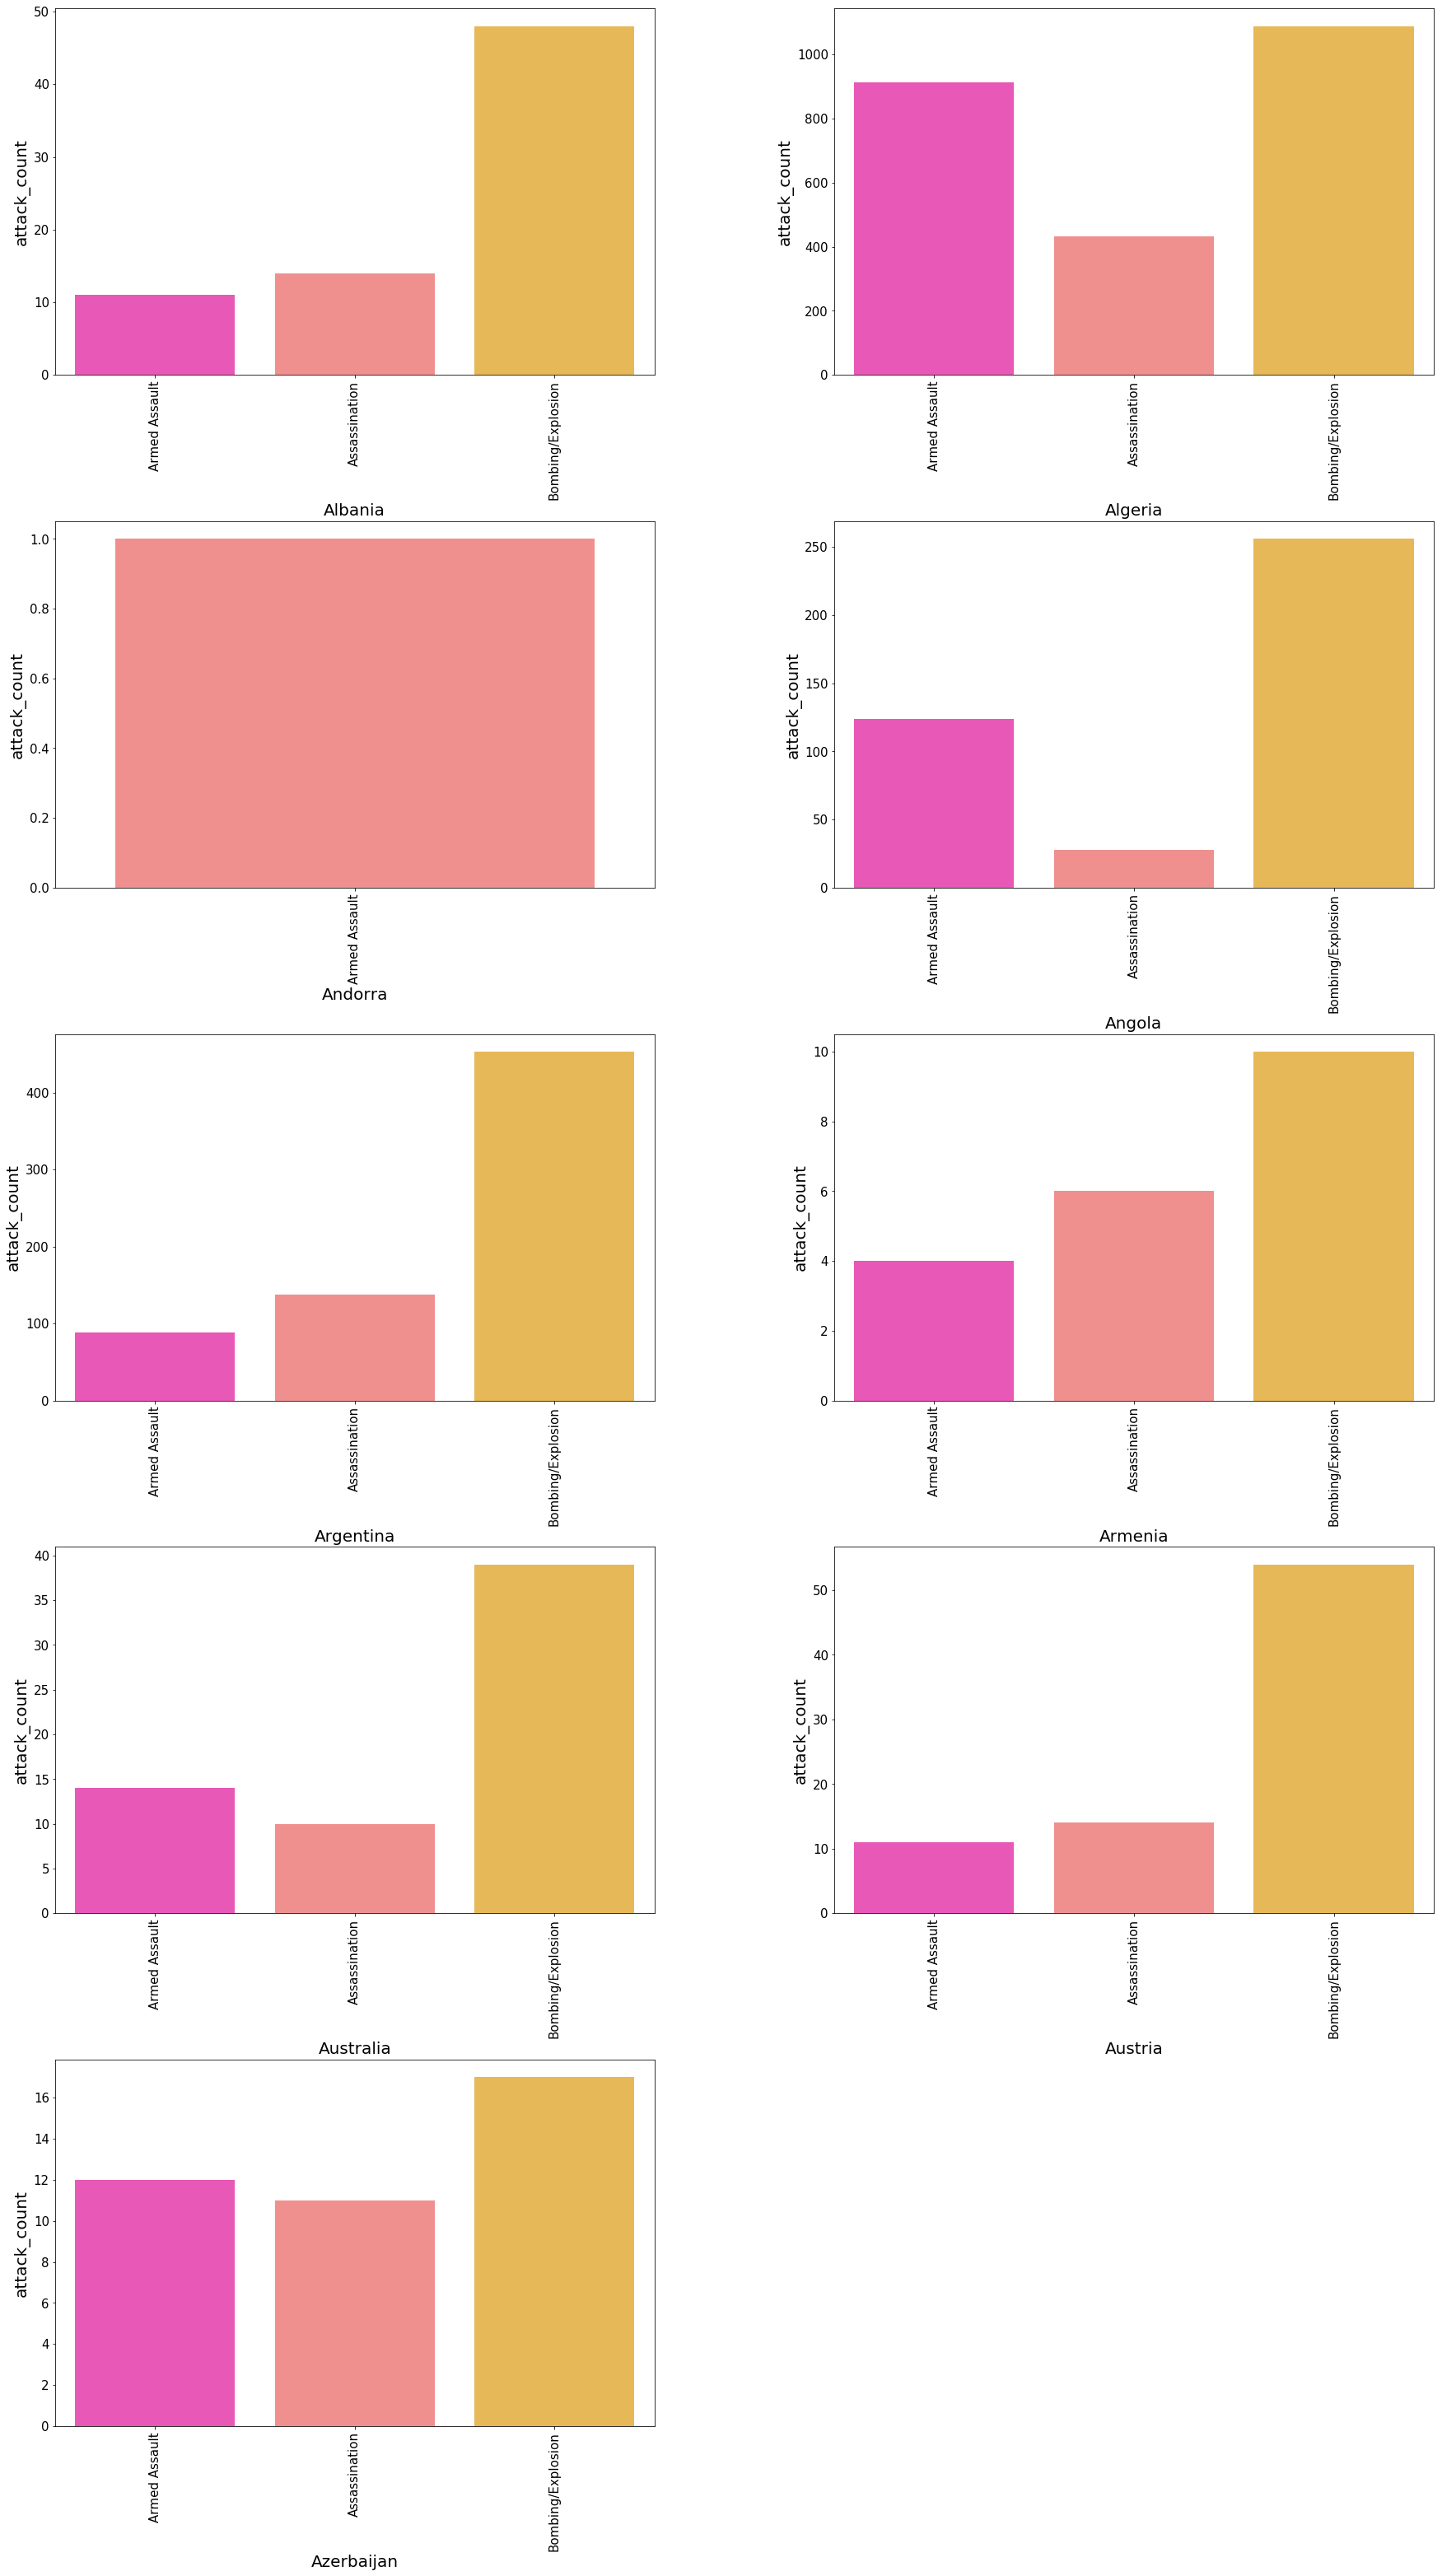

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
fig= plt.figure(figsize=(30,54))
fig.subplots_adjust(hspace=0.4,wspace=0.3)
for i in range(1,10):
    ax=fig.add_subplot(5,2,i)
    tempDTFrame = df_new[df_new.country_txt == df_new.country_txt .unique()[i]]
    ax=sns.barplot(x=tempDTFrame.attacktype1_txt,y=tempDTFrame.attack_count,palette='spring')
    plt.xticks(rotation=90,fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel(df_new.country_txt .unique()[i],fontsize=20)
    plt.ylabel('attack_count',fontsize=20)
    #plt.show()
   

In [101]:
df_weapon_year = df.loc[:,['iyear','weaptype1_txt']]

In [105]:
df_weap_yr = df_weapon_year.groupby(['iyear','weaptype1_txt']).agg({'weaptype1_txt':'count'})

In [107]:
df_weap_yr.columns=['weapon_count']

In [109]:
df_weap_yr.reset_index(drop=False,inplace=True)

In [137]:
df_latest = df_weap_yr[(df_weap_yr.iyear >2007) & (df_weap_yr.weaptype1_txt != 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)')].reset_index(drop=True)

In [138]:
df_latest

,iyear,weaptype1_txt,weapon_count
0,2008,Chemical,9
1,2008,Explosives,2755
2,2008,Fake Weapons,1
3,2008,Firearms,1309
4,2008,Incendiary,262
5,2008,Melee,104
6,2008,Other,4
7,2008,Sabotage Equipment,10
8,2008,Unknown,350
9,2009,Chemical,8


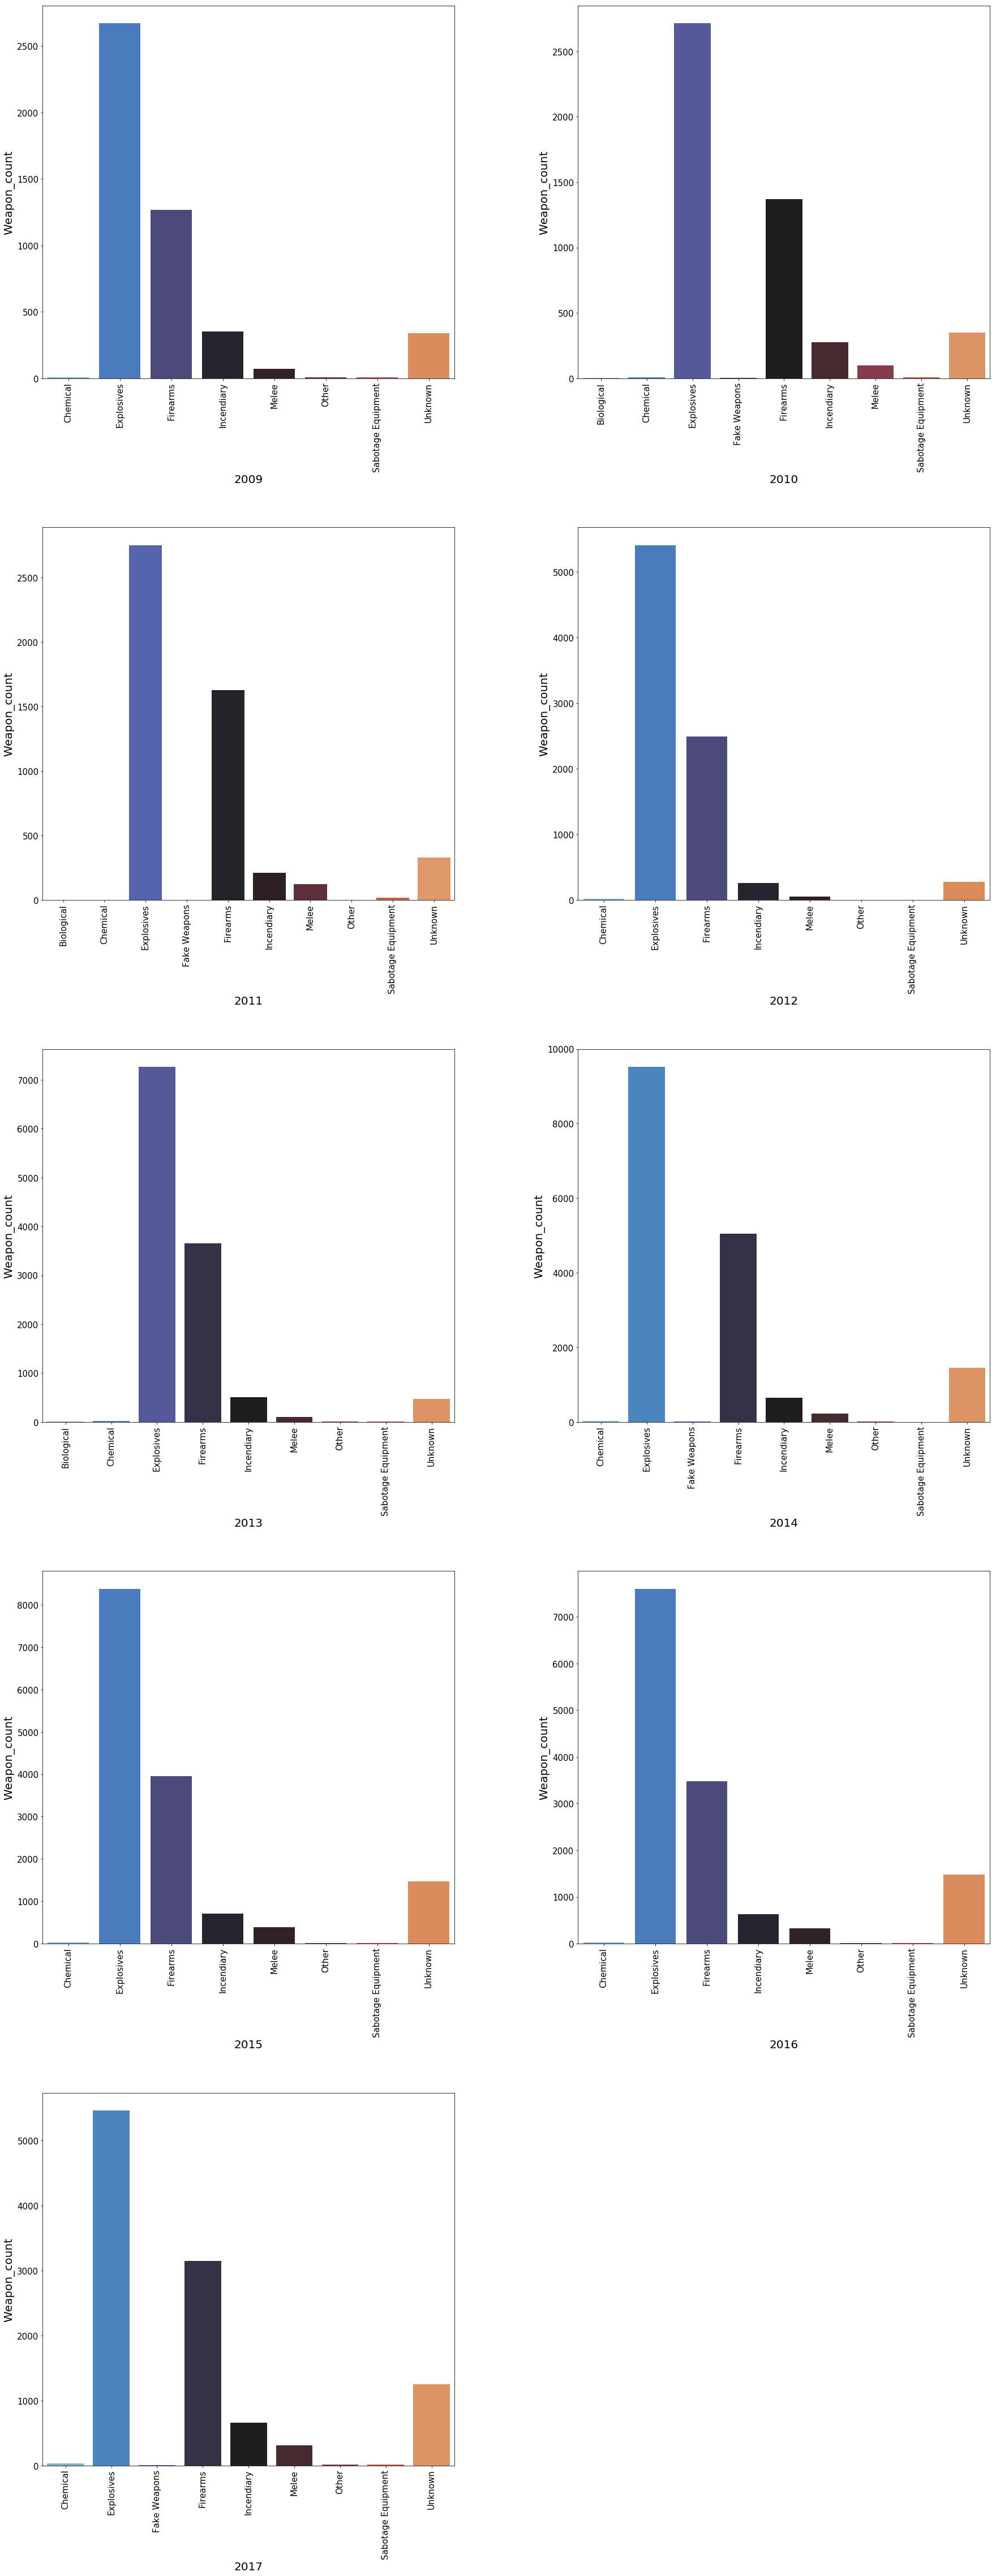

In [146]:
fig= plt.figure(figsize=(30,80))
fig.subplots_adjust(hspace=0.4,wspace=0.3)
for i in range(1,10):
    ax=fig.add_subplot(5,2,i)
    tempDTFrame = df_latest[df_latest.iyear == df_latest.iyear.unique()[i]]
    ax=sns.barplot(x=tempDTFrame.weaptype1_txt,y=tempDTFrame.weapon_count,palette='icefire')
    plt.xticks(rotation=90,fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel(df_latest.iyear .unique()[i],fontsize=20)
    plt.ylabel('Weapon_count',fontsize=20)
    #plt.show()
    from IPython.core.display import display, HTML
    display(HTML("<style>div.output_scroll { height: 100em; }</style>"))

# Which city has come under the most attacks

In [156]:
df_city = df.loc[:,['city','attacktype1_txt']]

In [188]:
df_city = df_city[df.city.str.contains('Unknown')==False]

In [189]:
cityList=''
for each in df_city.city:
    if cityList =='' and cityList !='Unknown':
        cityList = each
    else:
        cityList =cityList+' '+str(each)
cityList            


"Santo Domingo Mexico city Athens Fukouka Cairo Montevideo Oakland Madison Madison Baraboo Denver Rome Detroit Rio Piedras Berlin New York City Rio Grande Seattle Champaign Montevideo Seattle Seattle Jersey City Guatemala City Quezon City Caracas South Sioux City West Point New York City West Point New York City Norwalk Berlin Seattle South Sioux City South Sioux City Coral Gables Bamban Denver Portland Cairo New York City New York City New York City Akron Denver Seattle Seattle Dorado Rio Piedras Carolina Boston Whitewater New York City New York City New York City Batavia Munich Ypsilanti Berkeley Munich Berkeley New York City Eugene San Francisco Berkeley Berkeley San Francisco Oakland Buckeystown Covington Seattle Cleveland Vallejo Hartford New York City Seattle Frankfurt Zurich New York City New York City New York City Denver Ithaca Prairie du Sac South Sioux City South Sioux City South Sioux City South Sioux City Tucson Denver Champaign Boulder Hebron Manila Rome Boulder Colorado 

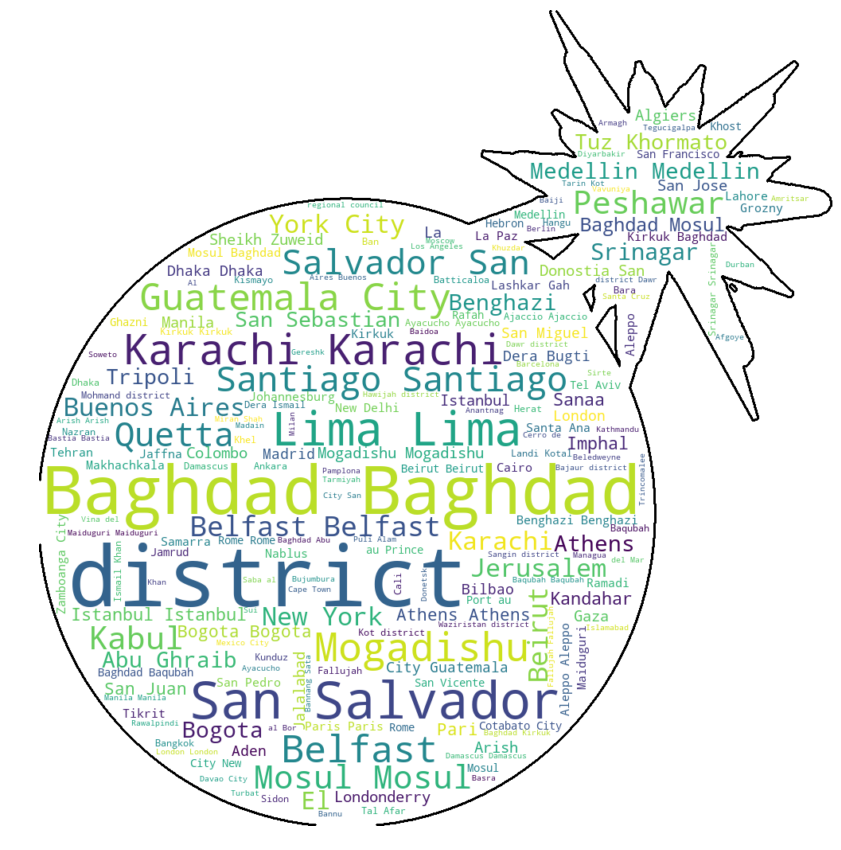

In [190]:

from wordcloud import WordCloud
from PIL import Image
def image_generator(image):
    python_mask = np.array(Image.open(image))
    wcObj = WordCloud(background_color='white',mask=python_mask,contour_color='black',contour_width=3)
    wcObj.generate(cityList)
    fig=plt.figure(figsize=(20,15))
    plt.imshow(wcObj,interpolation='bilinear')
    plt.axis('off')
    plt.savefig('bomb_wordcloud.png')
    #plt.show()
image_generator('bomb.jpg')

In [211]:
k = df.loc[:,['iyear']].groupby('iyear').agg({'iyear':'count'})

In [212]:
k.columns=['yearCount']

In [213]:
k = k.reset_index(drop=False)
k

,iyear,yearCount
0,1970,651
1,1971,471
2,1972,568
3,1973,473
4,1974,581
5,1975,740
6,1976,923
7,1977,1319
8,1978,1526
9,1979,2662


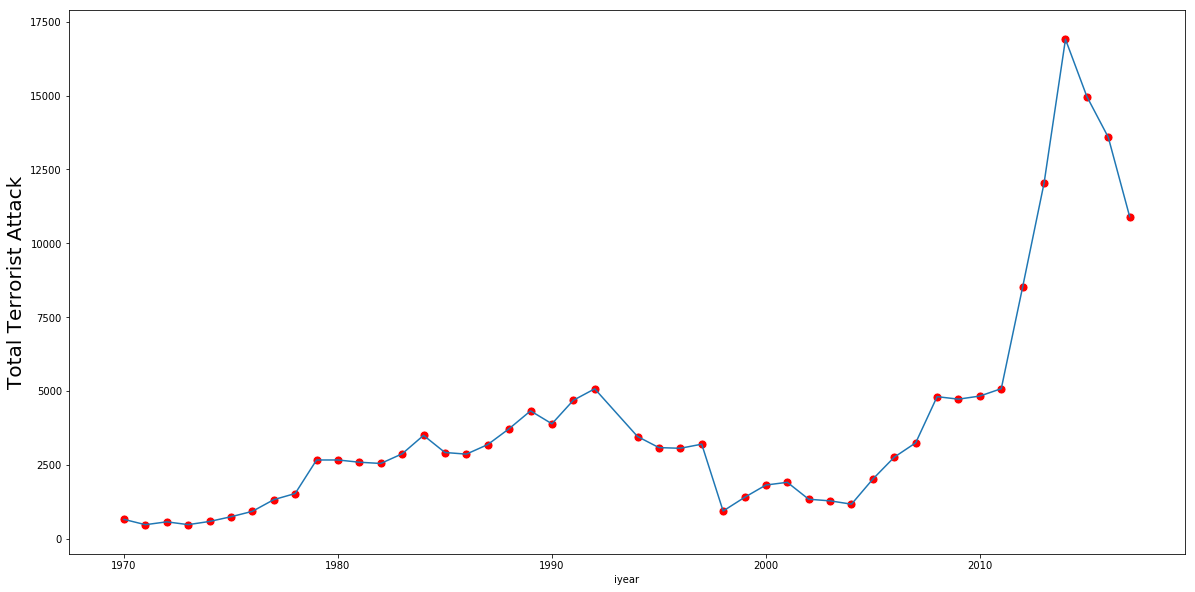

In [228]:
plt.figure(figsize=(20,10))
sns.lineplot(x=k.iyear,y=k.yearCount)
sns.scatterplot(x=k.iyear,y=k.yearCount,s=80,color='red')
plt.ylabel('Total Terrorist Attack',fontsize=20)
plt.show()

In [236]:
## States in USA with no of attacks

In [253]:
df_state = df[df.country_txt == 'United States'].loc[:,['provstate']].groupby('provstate').agg({'provstate':'count'})
df_state.columns=['state_attack_count']
df_state= df_state.reset_index(drop=False)

In [254]:
df_state.head()

,provstate,state_attack_count
0,Alabama,16
1,Alaska,1
2,Arizona,34
3,Arkansas,5
4,California,595


In [256]:
df_state_1= pd.read_csv('USA_YEAR.csv')
df_state_1 = df_state_1.loc[:,['Abbreviation','State']]
df_state_1.head()

,Abbreviation,State
0,MN,Minnesota
1,IL,Illinois
2,MO,Missouri
3,MI,Michigan
4,NH,New Hampshire


In [257]:
df_state_abb = pd.merge(df_state,df_state_1,left_on=['provstate'],right_on='State')

In [259]:
df_state_abb.head()

,provstate,state_attack_count,Abbreviation,State
0,Alabama,16,AL,Alabama
1,Arizona,34,AZ,Arizona
2,Arkansas,5,AR,Arkansas
3,California,595,CA,California
4,Colorado,45,CO,Colorado


In [274]:
import plotly.express as px  # Be sure to import express
fig = px.choropleth(state_df,  # Input Pandas DataFrame
                    locations="state",  # DataFrame column with locations
                    color="value",  # DataFrame column with color values
                    hover_name="state", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'State Rankings', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()

ImportError: cannot import name 'qualitative' from 'plotly.express.colors' (C:\Users\supratik chanda\Anaconda3\lib\site-packages\plotly\express\colors.py)

In [268]:
df_state_abb.columns

Index(['provstate', 'state_attack_count', 'Abbreviation', 'State'], dtype='object')

In [281]:
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd

#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')


scl = [
    [0.0, 'rgb(242,240,247)'],
    [0.2, 'rgb(218,218,235)'],
    [0.4, 'rgb(188,189,220)'],
    [0.6, 'rgb(158,154,200)'],
    [0.8, 'rgb(117,107,177)'],
    [1.0, 'rgb(84,39,143)']
]



fig = go.Figure(data=go.Choropleth(
    locations=df_state_abb['Abbreviation'], # Spatial coordinates
    z = df_state_abb['state_attack_count'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Millions USD",
))

fig.update_layout(
    title_text = '2011 US Agriculture Exports by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

AttributeError: module 'plotly.validators.choropleth' has no attribute 'LegendgroupValidator'